In [1]:
from fantasticfeatures.dataset_noise_generator import *
from fantasticfeatures.plotting import *
import numpy as np

C:\Users\TK\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
num_indep = 5
n_sample = 1000
bias = 10

X_base, y_base, coeffs = make_regression_custom(n_samples=n_sample, n_features=num_indep, n_informative=num_indep,
                   tail_strength=0, bias=bias, n_targets=1, noise=0, 
                       shuffle=False, coef=True, random_state=21, custom_coef=[1])


not all coefficients present, reverted to random coeffs


In [3]:
coeffs

array([33.69420808, 82.2582879 , 53.59961804, 48.71728899, 69.24151234])

In [4]:
y_check = theoretical_function_linear(X_base, coeffs, bias=bias)

mean abs Y:  109.74412936878156
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


In [5]:
import pandas as pd

In [6]:
df = data_to_df(X_base,y_base)

In [7]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'y'], dtype='object')

In [8]:
df['x3_2'] = df['x3']**2

In [9]:
nonlinear_subset = ['x0', 'x1', 'x2', 'x3_2', 'x4']

In [10]:
linear_subset = ['x0', 'x1', 'x2', 'x3', 'x4']

In [11]:
df['y_nonlin'] = theoretical_function_linear(df[nonlinear_subset].to_numpy(), coeffs, bias=bias)

mean abs Y:  122.34482675196742
mean abs noise:  0.0
mean SNR:  inf


# Our ideal data 

### Linear option

Expected error estimate: 0.09846858711566796


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.035e+32
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:18:42   Log-Likelihood:                 22670.
No. Observations:                 800   AIC:                        -4.533e+04
Df Residuals:                     794   BIC:                        -4.530e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000   4.25e-15   2.35e+15      0.000      10.000      10.000
x1            33.6942   4.25e-15   7.92e+15      0.000      33.694      33.694
x2            82.2583   4.34e-15    1.9e+16      0.000      82.258      82.258
x3            53.5996   4.31e-15   1.24e+16      0.000      53.600      53.600
x4            48.7173   4.24e-15   1.15e+16      0.000      48.717      48.717
x5            69.2415   4.27e-15   1.62e+16      0.000      69.242      69.242
==============================================================================
Omnibus:                        0.725   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.816
Skew:                           0.056   Prob(JB):                        0.665
Kurtosis:                       2.891   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

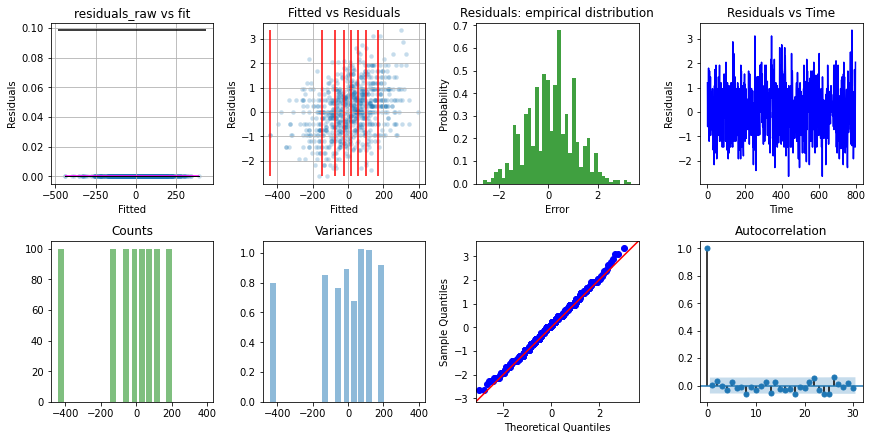

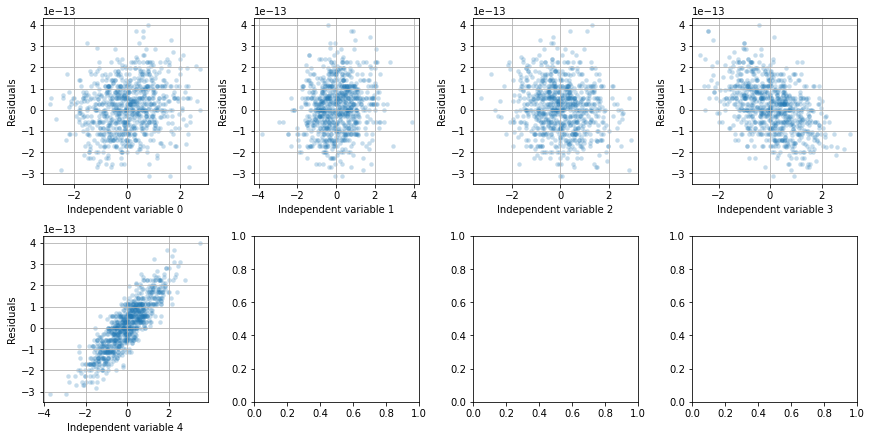

In [12]:
_,_,model,_  = train_and_diagnose(df[linear_subset].to_numpy(), df['y'].to_numpy())
model.summary()

### Non-linear option

Expected error estimate: 0.5982109472259062


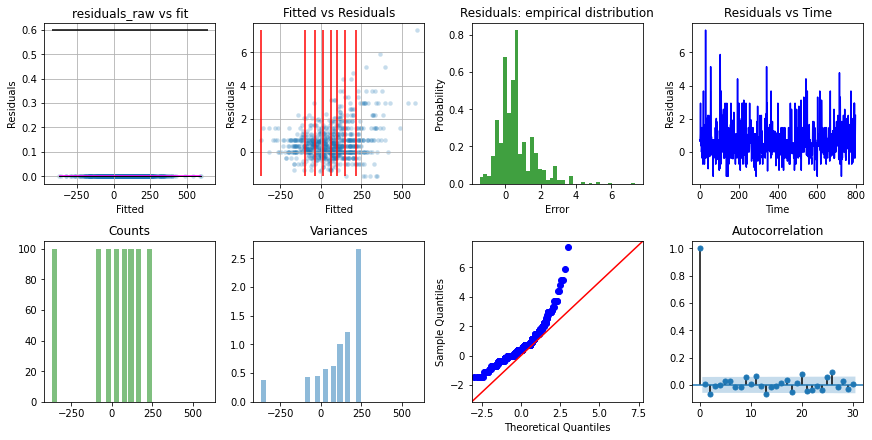

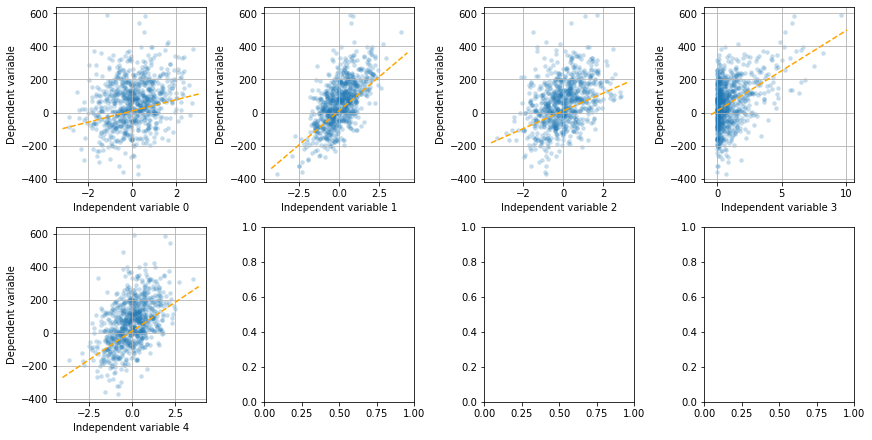

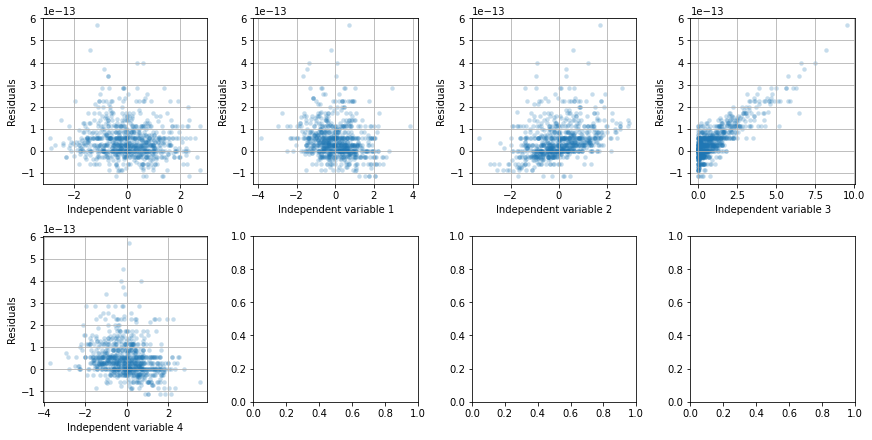

In [13]:
_,_,_,_  = train_and_diagnose(df[nonlinear_subset].to_numpy(), df['y_nonlin'].to_numpy(), plot_variables=True)

### y depending on nonlinear x, but only linear x measured 

Notice the change of scale on the residuals! 

Expected error estimate: -1.3211653993039362e-16


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     612.8
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.20e-269
Time:                        09:18:56   Log-Likelihood:                -4462.1
No. Observations:                 800   AIC:                             8936.
Df Residuals:                     794   BIC:                             8964.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.6563      2.278     25.754      0.000      54.185      63.127
x1            32.5307      2.280     14.266      0.000      28.055      37.007
x2            82.7914      2.324     35.622      0.000      78.229      87.354
x3            51.4823      2.311     22.279      0.000      46.946      56.018
x4             2.7606      2.274      1.214      0.225      -1.703       7.224
x5            68.3843      2.288     29.884      0.000      63.892      72.876
==============================================================================
Omnibus:                      403.258   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2199.350
Skew:                           2.313   Prob(JB):                         0.00
Kurtosis:                       9.678   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

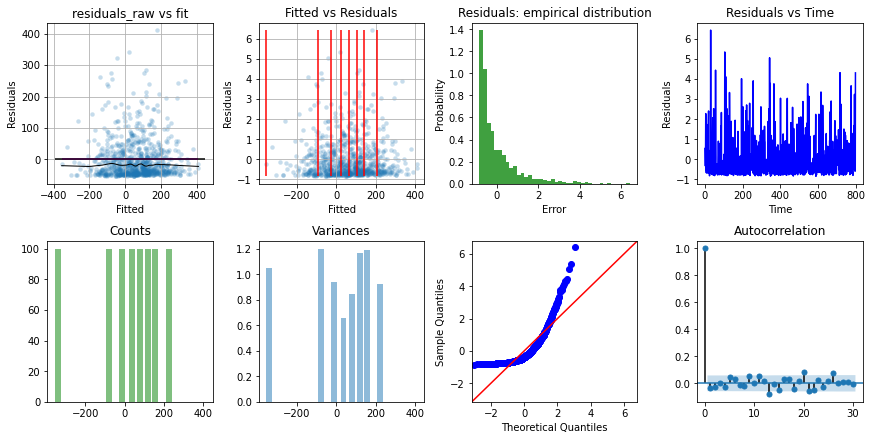

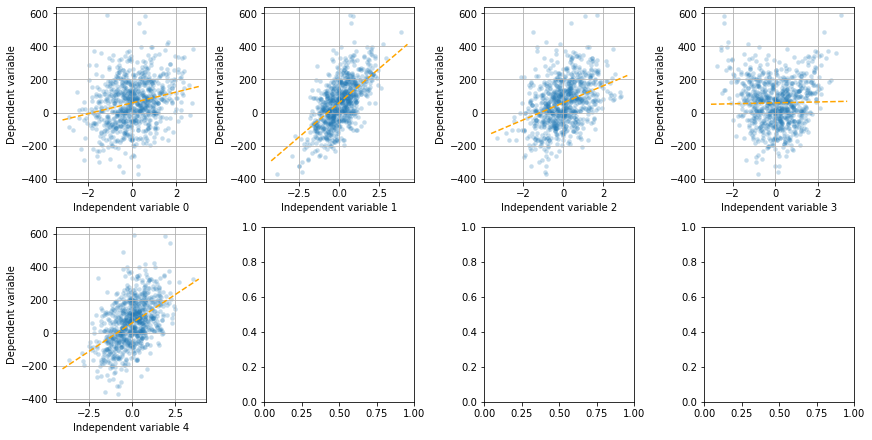

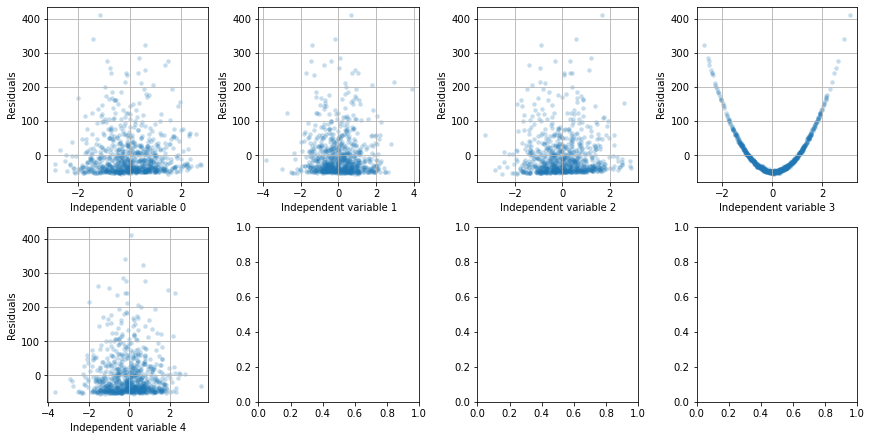

In [14]:
_,_,model,_  = train_and_diagnose(df[linear_subset].to_numpy(), df['y_nonlin'].to_numpy(), plot_variables=True)
model.summary()

In [15]:
bias, coeffs

(10, array([33.69420808, 82.2582879 , 53.59961804, 48.71728899, 69.24151234]))

In [16]:
model.params

array([58.65625568, 32.53072869, 82.79144451, 51.48226827,  2.7606193 ,
       68.38430502])

- Which coefficient did change? (Remember we changed `x3`) 
- What happened to the intercept? 
- Why is that? 

# Let's add noise to the y data 

In [17]:
df

,x0,x1,x2,x3,x4,y,x3_2,y_nonlin
0,-0.051964,-0.111196,1.041797,-1.256739,0.745388,45.329059,1.579394,183.497767
1,-1.711054,-0.205864,-0.234571,1.128144,-0.012626,-23.073705,1.272709,-16.030893
2,-0.613200,1.373688,1.610992,-0.689228,0.691924,203.017032,0.475036,259.736812
3,-0.448116,0.162342,0.257229,-1.275456,0.064004,-35.662491,1.626788,105.726944
4,-1.061857,-0.989368,-0.457723,-1.984182,-1.476442,-330.590993,3.936977,-42.128213
...,...,...,...,...,...,...,...,...
995,0.562333,-1.228321,-1.049781,-1.215147,0.281870,-168.041614,1.476582,-36.907868
996,1.651902,1.231726,0.105725,-0.680306,0.693801,187.543169,0.462817,243.233014
997,0.445001,-0.810530,0.578105,0.245080,-0.970373,-65.943073,0.060064,-74.956534
998,1.677446,-0.090463,0.762729,1.383376,-1.508284,62.919357,1.913730,88.756750


<AxesSubplot:>

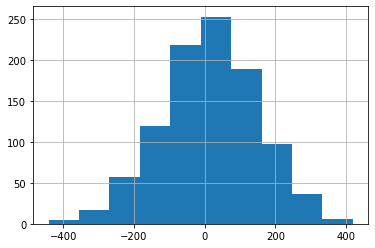

In [26]:
df['y'].hist()

(array([  3.,  10.,  43., 155., 282., 267., 178.,  49.,   9.,   4.]),
 array([-37.18020614, -29.69469462, -22.20918311, -14.7236716 ,
         -7.23816008,   0.24735143,   7.73286294,  15.21837446,
         22.70388597,  30.18939748,  37.674909  ]),
 <a list of 10 Patch objects>)

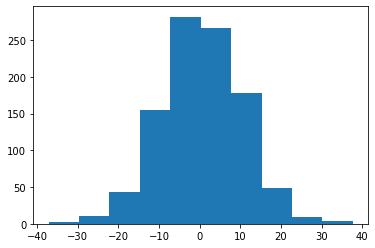

In [18]:
plt.hist(gen_noise(df['y'].to_numpy(),10,'normal'))

In [19]:
df['y_noisy'] = df['y'] + gen_noise(df['y'].to_numpy(),10,'normal')

df['y_nonlin_noisy'] = df['y_nonlin'] + gen_noise(df['y_nonlin'].to_numpy(),10,'normal')

Expected error estimate: -1.3211653993039362e-16


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     612.8
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.20e-269
Time:                        09:19:14   Log-Likelihood:                -4462.1
No. Observations:                 800   AIC:                             8936.
Df Residuals:                     794   BIC:                             8964.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.6563      2.278     25.754      0.000      54.185      63.127
x1            32.5307      2.280     14.266      0.000      28.055      37.007
x2            82.7914      2.324     35.622      0.000      78.229      87.354
x3            51.4823      2.311     22.279      0.000      46.946      56.018
x4             2.7606      2.274      1.214      0.225      -1.703       7.224
x5            68.3843      2.288     29.884      0.000      63.892      72.876
==============================================================================
Omnibus:                      403.258   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2199.350
Skew:                           2.313   Prob(JB):                         0.00
Kurtosis:                       9.678   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

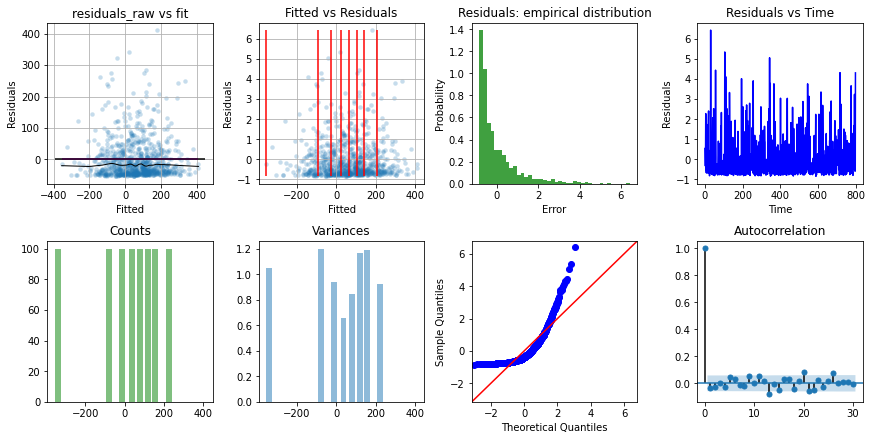

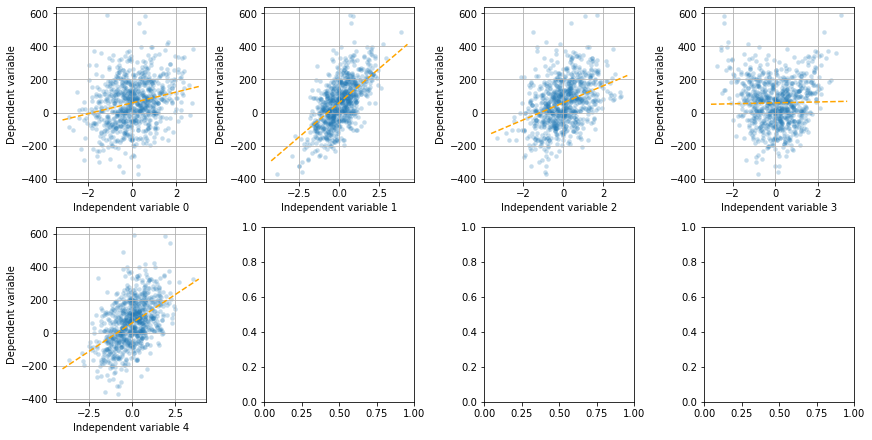

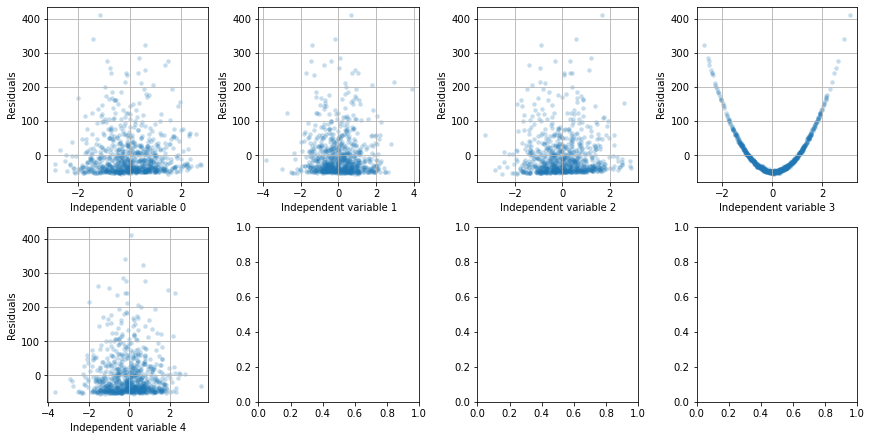

In [20]:
_,_,model,_  = train_and_diagnose(df[linear_subset].to_numpy(), df['y_nonlin'].to_numpy(), plot_variables=True)
model.summary()

#### Adding both x3 and x3_2

In [21]:
linear_subset + ['x3_2']

['x0', 'x1', 'x2', 'x3', 'x4', 'x3_2']

Expected error estimate: 0.8102950786303572


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.487e+30
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:19:21   Log-Likelihood:                 20947.
No. Observations:                 800   AIC:                        -4.188e+04
Df Residuals:                     793   BIC:                        -4.185e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000    4.6e-14   2.18e+14      0.000      10.000      10.000
x1            33.6942   3.67e-14   9.19e+14      0.000      33.694      33.694
x2            82.2583   3.74e-14    2.2e+15      0.000      82.258      82.258
x3            53.5996   3.72e-14   1.44e+15      0.000      53.600      53.600
x4          -6.35e-14   3.66e-14     -1.735      0.083   -1.35e-13    8.33e-15
x5            69.2415   3.68e-14   1.88e+15      0.000      69.242      69.242
x6            48.7173   2.78e-14   1.75e+15      0.000      48.717      48.717
==============================================================================
Omnibus:                       33.290   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.496
Skew:                           0.442   Prob(JB):                     2.65e-09
Kurtosis:                       3.636   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

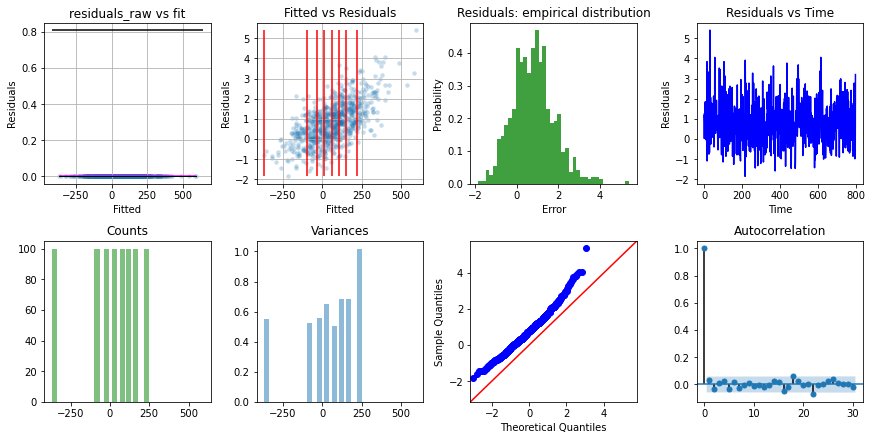

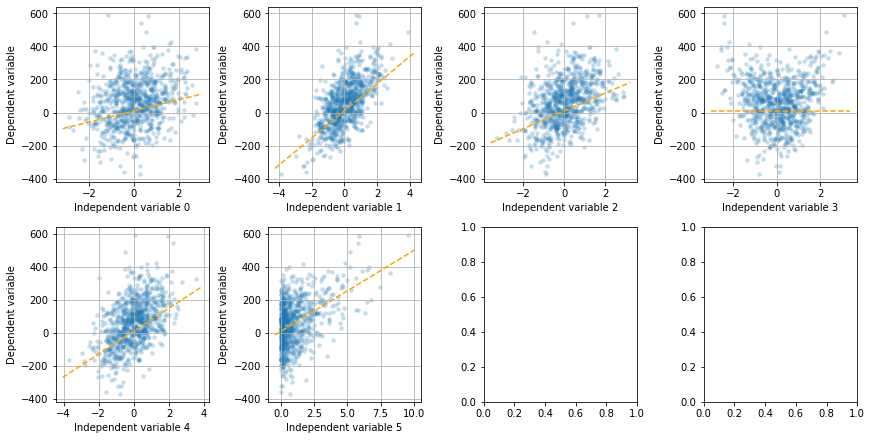

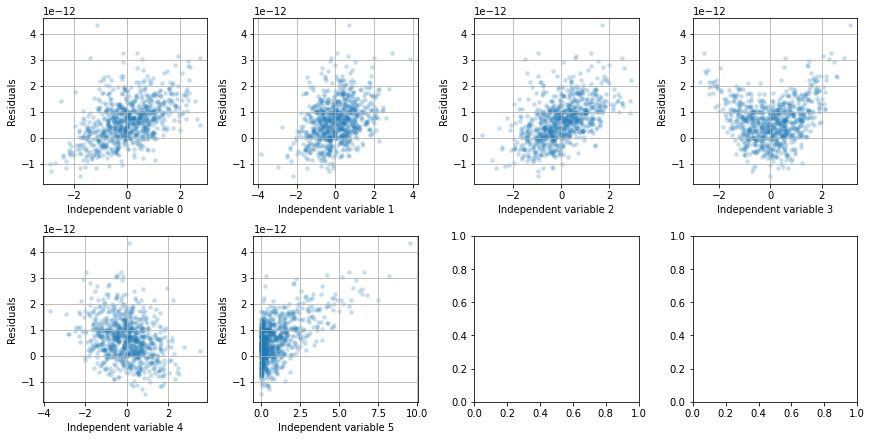

In [22]:
_,_,model,_  = train_and_diagnose(df[linear_subset + ['x3_2']].to_numpy(), df['y_nonlin'].to_numpy(), plot_variables=True)
model.summary()

Notice what happened to the coefficient of the fourth parameter - so our `x3` - it got collapsed to zero, compare also its t-value. 

### More nonlinear things...

In [23]:
df['x1_l'] = df['x1'].apply(lambda x: np.log(np.abs(x)))

<AxesSubplot:>

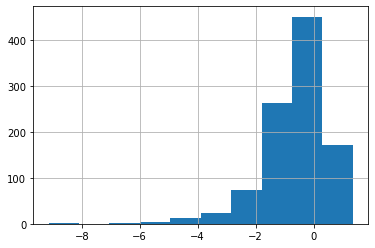

In [76]:
df['x1_l'].hist()

In [24]:
df['x1_s'] = df['x1'].apply(lambda x: np.sqrt(np.abs(x)))

In [25]:
df['x2_e'] = (df['x1'].apply(np.exp))/4

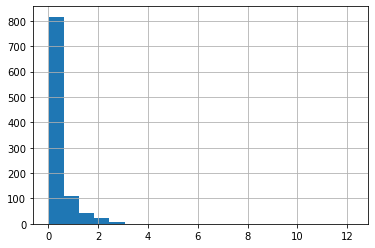

In [26]:
df['x2_e'].hist(bins=20)

In [27]:
nonlinear_subset_2 = ['x0', 'x1_l', 'x2_e', 'x3_2', 'x4']

In [28]:
df['y_nonlin_2'] = theoretical_function_linear(df[nonlinear_subset_2].to_numpy(), coeffs, bias=bias)

mean abs Y:  112.3594231985254
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


In [29]:
df['y_nonlin_2_noisy'] = df['y_nonlin_2'] + gen_noise(df['y_nonlin_2'].to_numpy(),10,'normal')

Expected error estimate: -3.7747582837255325e-17


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     67.28
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.21e-58
Time:                        09:19:39   Log-Likelihood:                -4970.9
No. Observations:                 800   AIC:                             9954.
Df Residuals:                     794   BIC:                             9982.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.7284      4.302      6.446      0.000      19.284      36.173
x1            29.5595      4.307      6.863      0.000      21.105      38.014
x2            31.9271      4.390      7.273      0.000      23.310      40.544
x3            -8.7022      4.365     -1.994      0.047     -17.270      -0.135
x4             3.9176      4.295      0.912      0.362      -4.513      12.349
x5            64.6381      4.322     14.955      0.000      56.154      73.122
==============================================================================
Omnibus:                       99.242   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.941
Skew:                           0.305   Prob(JB):                    7.46e-147
Kurtosis:                       7.452   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

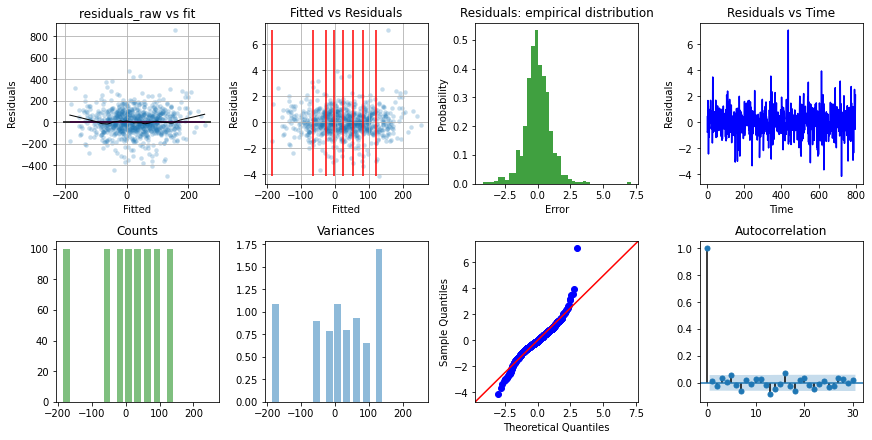

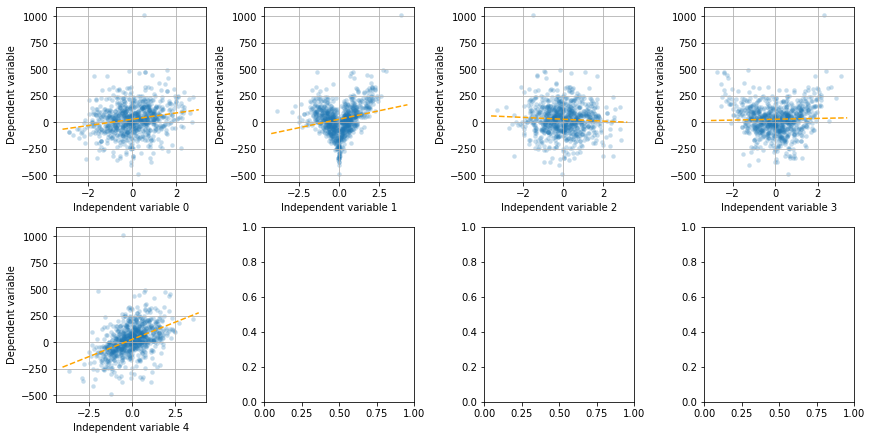

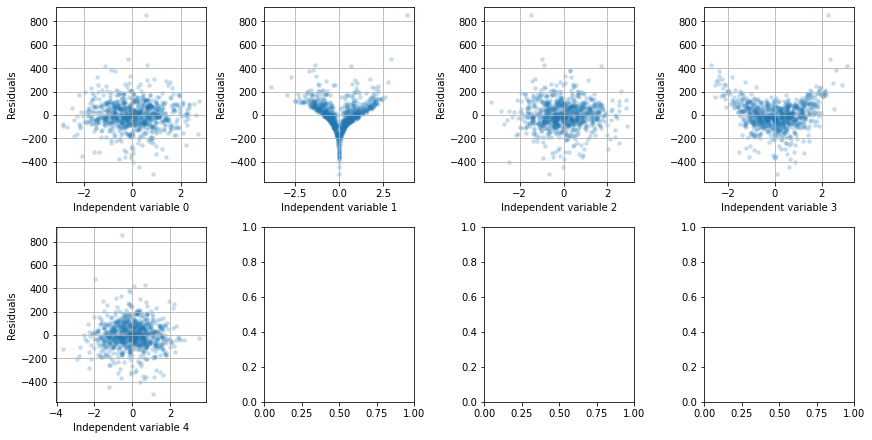

In [30]:
_,_,model,_  = train_and_diagnose(df[linear_subset].to_numpy(), df['y_nonlin_2'].to_numpy(), plot_variables=True)
model.summary()

# Nonlinear y?

Sometimes we may measure y, which is a nonlinear function of x - for example, measuring sound level in dB as a function of sound energy. 

#### Linear x, nonlinear y

In [31]:
df['y_abs'] = theoretical_function_linear(df[linear_subset].apply(np.abs).to_numpy(), coeffs, bias=bias)

mean abs Y:  239.71079971652873
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


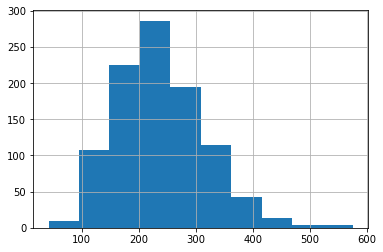

In [32]:
df['y_abs'].hist()

In [33]:
df['y_abs_l'] = df['y_abs'].apply(lambda x: np.log(np.abs(x)))*50

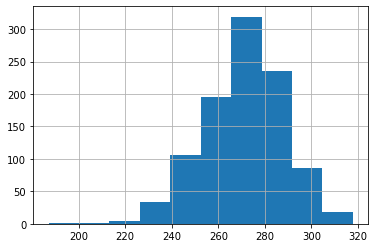

In [34]:
(df['y_abs_l']).hist()

In [35]:
df['y_abs_l_noisy'] = df['y_abs_l'] + gen_noise(df['y_abs_l'].to_numpy(),10,'normal')

Expected error estimate: -1.4904050216202335e-15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     365.4
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          4.39e-203
Time:                        09:19:50   Log-Likelihood:                -3024.8
No. Observations:                 800   AIC:                             6062.
Df Residuals:                     794   BIC:                             6090.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        223.7511      1.205    185.679      0.000     221.386     226.117
x1             7.4338      0.625     11.901      0.000       6.208       8.660
x2            16.8702      0.635     26.569      0.000      15.624      18.117
x3            11.4814      0.631     18.193      0.000      10.243      12.720
x4            10.5508      0.643     16.407      0.000       9.288      11.813
x5            13.9158      0.627     22.195      0.000      12.685      15.147
==============================================================================
Omnibus:                        7.627   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.792
Skew:                          -0.195   Prob(JB):                       0.0203
Kurtosis:                       3.285   Cond. No.                         7.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

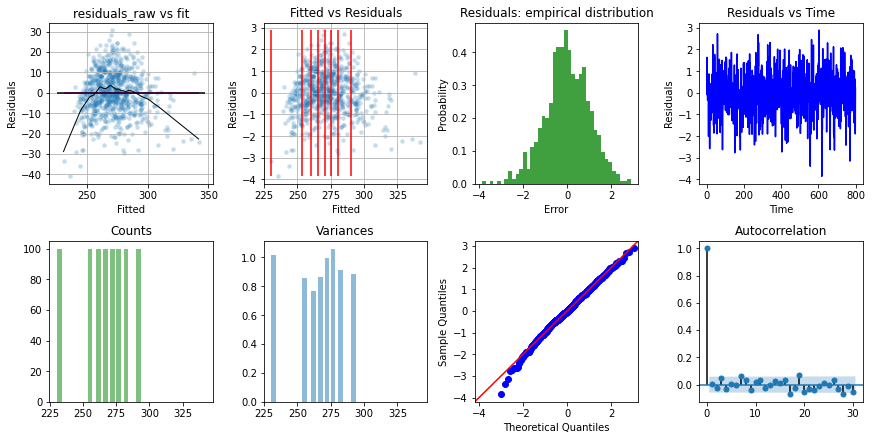

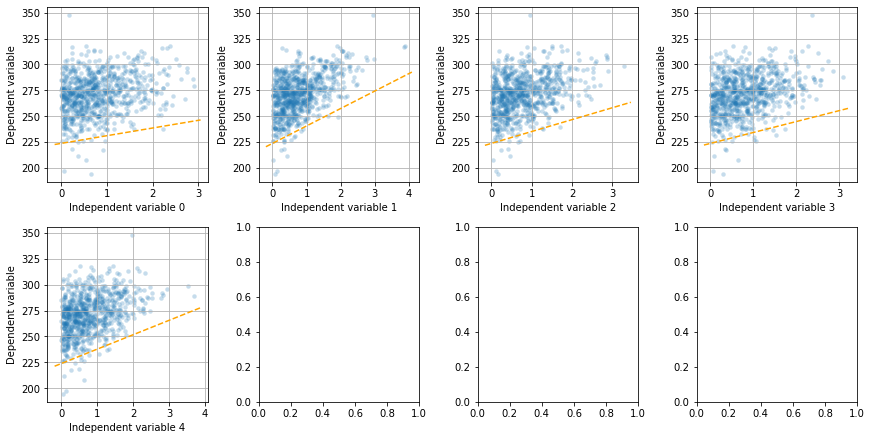

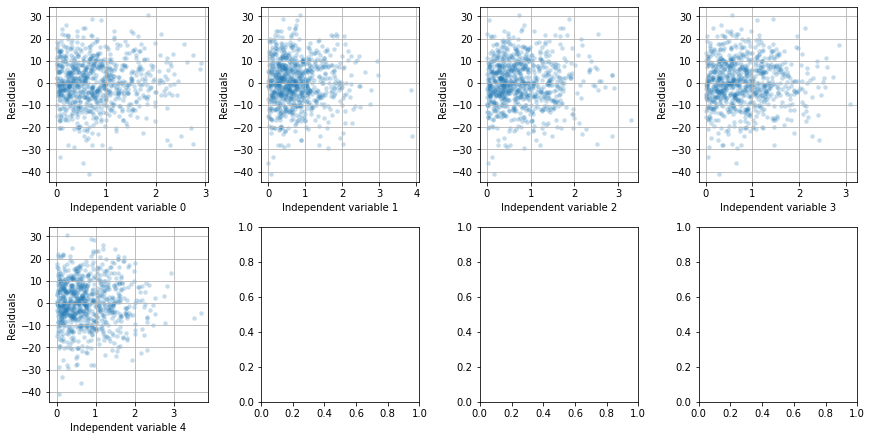

In [36]:
_,_,model,_  = train_and_diagnose(df[linear_subset].apply(np.abs).to_numpy(), df['y_abs_l_noisy'].to_numpy(), plot_variables=True)
model.summary()

___

In [38]:
df_abs

,x0,x1,x2,x3,x4,y_noisy
0,0.051964,0.111196,1.041797,1.256739,0.745388,260.815464
1,1.711054,0.205864,0.234571,1.128144,0.012626,272.092134
2,0.613200,1.373688,1.610992,0.689228,0.691924,289.901670
3,0.448116,0.162342,0.257229,1.275456,0.064004,252.173899
4,1.061857,0.989368,0.457723,1.984182,1.476442,291.434796
...,...,...,...,...,...,...
995,0.562333,1.228321,1.049781,1.215147,0.281870,273.991659
996,1.651902,1.231726,0.105725,0.680306,0.693801,260.867816
997,0.445001,0.810530,0.578105,0.245080,0.970373,270.746436
998,1.677446,0.090463,0.762729,1.383376,1.508284,265.122778


In [39]:
df_abs['x0_s'] = np.sqrt(df_abs['x0'])

In [42]:
df_abs['x4_o'] = 1/(1+(df_abs['x4']))

In [45]:
nonlin3 = ['x0_s','x1','x2','x3','x4_o']

In [46]:
df_abs['y_nonlin3'] = theoretical_function_linear(df_abs[nonlin3].to_numpy(), coeffs, bias=bias)

mean abs Y:  226.88135381299227
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


In [48]:
df_abs['y_nonlin3_noisy'] = df_abs['y_nonlin3'] + gen_noise(df_abs['y_nonlin3'].to_numpy(),10,'normal')

(array([ 49., 202., 308., 232., 132.,  53.,  21.,   2.,   0.,   1.]),
 array([ 74.2079747 , 125.98246596, 177.75695721, 229.53144846,
        281.30593971, 333.08043096, 384.85492221, 436.62941346,
        488.40390471, 540.17839596, 591.95288721]),
 <a list of 10 Patch objects>)

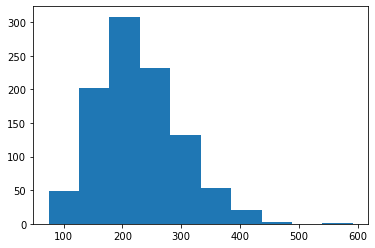

In [49]:
plt.hist(df_abs['y_nonlin3_noisy'])

In [50]:
df_abs[linear_subset+['y_nonlin3_noisy']].to_csv('./data/ex1/mystery_nonlinear_4.csv')

___

In [54]:
df_abs['x2_3'] = (df_abs['x2']**3)/5

(array([882.,  75.,  19.,   8.,   8.,   2.,   4.,   0.,   1.,   1.]),
 array([1.30269982e-09, 7.16041919e-01, 1.43208384e+00, 2.14812575e+00,
        2.86416767e+00, 3.58020959e+00, 4.29625151e+00, 5.01229342e+00,
        5.72833534e+00, 6.44437726e+00, 7.16041917e+00]),
 <a list of 10 Patch objects>)

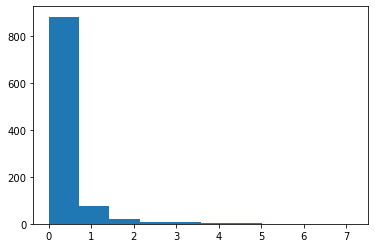

In [55]:
plt.hist(df_abs['x2_3'])

In [58]:
df_abs['x1_e'] = np.exp(df_abs['x1'])/5

(array([791., 120.,  58.,  18.,   6.,   1.,   2.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.20002129, 0.67909151, 1.15816173, 1.63723195, 2.11630217,
        2.59537239, 3.07444261, 3.55351283, 4.03258305, 4.51165327,
        4.99072349, 5.46979371, 5.94886393, 6.42793415, 6.90700437,
        7.38607459, 7.86514482, 8.34421504, 8.82328526, 9.30235548,
        9.7814257 ]),
 <a list of 20 Patch objects>)

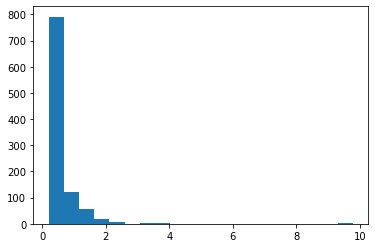

In [60]:
plt.hist(df_abs['x1_e'], bins=20)

In [61]:
nonlin4 = ['x0','x1_e','x2_3','x3','x4']

In [62]:
df_abs['y_nonlin4'] = theoretical_function_linear(df_abs[nonlin4].to_numpy(), coeffs, bias=bias)

mean abs Y:  194.5745246528086
mean abs noise:  0.0
mean SNR:  inf


D:\ds_freelance\2021_amld_workshop\code\fantasticfeatures\fantasticfeatures\dataset_noise_generator.py:122: RuntimeWarning: divide by zero encountered in true_divide
  print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())


In [67]:
df_abs['y_nonlin4b'] = df_abs['y_nonlin4'].apply(lambda x: (x**2) / 1000)

(array([542., 319.,  90.,  24.,   9.,   5.,   6.,   0.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   1.85524518,   36.2117885 ,   70.56833182,  104.92487513,
         139.28141845,  173.63796177,  207.99450508,  242.3510484 ,
         276.70759171,  311.06413503,  345.42067835,  379.77722166,
         414.13376498,  448.49030829,  482.84685161,  517.20339493,
         551.55993824,  585.91648156,  620.27302488,  654.62956819,
         688.98611151,  723.34265482,  757.69919814,  792.05574146,
         826.41228477,  860.76882809,  895.12537141,  929.48191472,
         963.83845804,  998.19500135, 1032.55154467]),
 <a list of 30 Patch objects>)

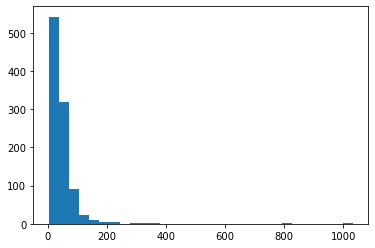

In [75]:
plt.hist(df_abs['y_nonlin4b'],bins=30)

1000.0
30


(array([  4.,   8.,  19.,  33., 407., 455.,  49.,  10.,   7.,   8.]),
 array([-19.24111952, -15.41291881, -11.5847181 ,  -7.7565174 ,
         -3.92831669,  -0.10011598,   3.72808473,   7.55628544,
         11.38448614,  15.21268685,  19.04088756]),
 <a list of 10 Patch objects>)

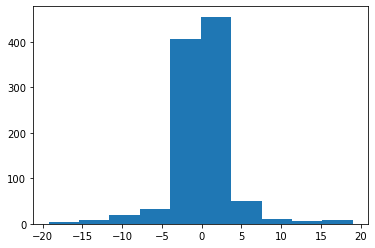

In [76]:
plt.hist(gen_noise(df_abs['y_nonlin4b'].to_numpy(),1,'cauchy', truncate=20))

In [77]:
df_abs['y_nonlin4b_noisy'] = df_abs['y_nonlin4b'] + gen_noise(df_abs['y_nonlin4b'].to_numpy(),1,'cauchy', truncate=20)

1000.0
30


In [78]:
df_abs[linear_subset+['y_nonlin4b_noisy']].to_csv('./data/ex1/mystery_nonlinear_5.csv')

### Data export

In [106]:
df.to_csv('data_with_nonlinearity.csv')

In [109]:
df.head()

,x0,x1,x2,x3,x4,y,x3_2,y_nonlin,y_noisy,y_nonlin_noisy,x1_l,x2_e,y_nonlin_2,x1_s,y_nonlin_2_noisy,y_l,y_l_noisy,y_abs,y_abs_l,y_abs_l_noisy
0,-0.051964,-0.111196,1.041797,-1.256739,0.745388,45.329059,1.579394,183.497767,43.905470,182.074178,-2.196460,0.223691,-31.882677,0.333461,-33.306266,3.813948,2.390360,189.574303,262.239052,260.815464
1,-1.711054,-0.205864,-0.234571,1.128144,-0.012626,-23.073705,1.272709,-16.030893,-2.501488,4.541324,-1.580538,0.203486,-105.629468,0.453723,-85.057251,3.138694,23.710911,152.993944,251.519917,272.092134
2,-0.613200,1.373688,1.610992,-0.689228,0.691924,203.017032,0.475036,259.736812,205.849651,262.569431,0.317499,0.987473,139.436145,1.172045,142.268764,5.313290,8.145909,311.494294,287.069051,289.901670
3,-0.448116,0.162342,0.257229,-1.275456,0.064004,-35.662491,1.626788,105.726944,-22.364372,119.025064,-1.818047,0.294066,-55.202089,0.402917,-41.903969,3.574099,16.872219,118.808813,238.875779,252.173899
4,-1.061857,-0.989368,-0.457723,-1.984182,-1.476442,-330.590993,3.936977,-42.128213,-332.137211,-43.674431,-0.010689,0.092953,67.892346,0.994670,66.346127,5.800882,4.254663,350.590993,292.981014,291.434796


In [110]:
df[linear_subset + ['y_noisy']].to_csv('mystery_linear.csv')

In [ ]:
# nonlinear_subset = ['x0', 'x1', 'x2', 'x3_2', 'x4']
df[linear_subset + ['y_nonlin_noisy']].to_csv('mystery_nonlinear_1.csv')

In [111]:
# nonlinear_subset_2 = ['x0', 'x1_l', 'x2_e', 'x3_2', 'x4']
df[linear_subset + ['y_nonlin_2_noisy']].to_csv('mystery_nonlinear_2.csv')

In [37]:
df_abs = df[linear_subset].apply(np.abs)

df_abs['y_noisy'] = df['y_abs_l_noisy']

In [116]:
# y => log(y), all abs 
df_abs[linear_subset + ['y_noisy']].to_csv('mystery_nonlinear_3.csv')